In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import os
import os.path
import librosa
import librosa.display
from tqdm.notebook import tqdm
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib as mat_agg
mat_agg.use('Agg')

import resampy
%matplotlib inline

from scipy import signal
from scipy.io import wavfile
import wavio

import scipy.signal as sps
from io import BytesIO


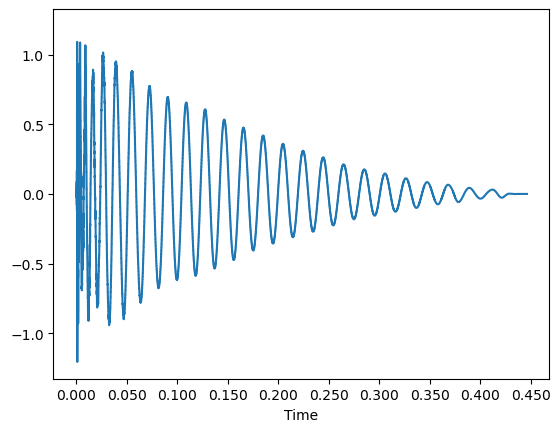

In [34]:
sound_file = "kick.wav"
audio_data, sampling_rate = librosa.load(sound_file)
librosa.display.waveshow(audio_data, sr = sampling_rate)
ipd.Audio(sound_file)

(2459,)


/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4246411040.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, audio_data2 = wavfile.read(sound_file)


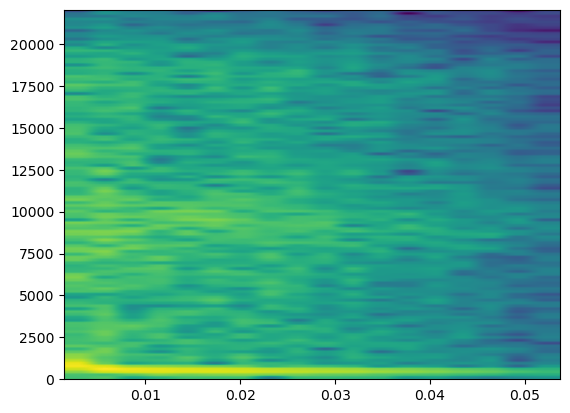

In [35]:
sampling_rate, audio_data2 = wavfile.read(sound_file)
audio_data2 = audio_data2[:,0]
audio_data2 = signal.decimate(audio_data2, 8)

print(audio_data2.shape)
spectrum, freqs, t, im = plt.specgram(audio_data2, Fs = sampling_rate)

In [33]:
metadata= pd.read_csv('directory.csv')
metadata.head()

File name
0         01 F# Synth.wav
1  01_PA_Bass_Shot_C#.wav
2               01_hh.wav
3         02 F# Synth.wav
4  02_PA_Bass_Shot_F#.wav

In [14]:
def features_extractor(file):
    try:
        
        #samplingFrequency, signalData = wavfile.read(file)
        signalData, samplingFrequency  = librosa.load(file, sr=3000)
        #signalData = signalData[:,0]
        #signalData = signal.decimate(signalData, 6)
        
        
        spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
        
        temporal_features = spectrum.flatten('F')
        #print(len(spectrum[0]))
        temporal_features = np.pad(temporal_features,(0, 23*129 - len(temporal_features)), 'constant')
        
        mat_agg.pyplot.clf()
        return temporal_features
    except Exception:
        pass

In [15]:
print(features_extractor(sound_file))

[2.75501228e-05 1.67240481e-05 1.24103660e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


<Figure size 640x480 with 0 Axes>

In [16]:
librosa.load(os.path.join(os.getcwd(), 'filtered_samples/01_hh.wav'))

(array([ 0.00129546,  0.00908687, -0.00515714, ..., -0.00295659,
         0.00114698,  0.        ], dtype=float32),
 22050)

In [17]:
data = features_extractor("kick.wav")
print(data.shape)

(2967,)


<Figure size 640x480 with 0 Axes>

In [18]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.getcwd(),'filtered_samples/',str(row["File name"]))
    #print(file_name)
    #final_class_labels=row["class"]
    data=features_extractor(file_name)
    if data is None:
        pass
    else:
        extracted_features.append([data,file_name])

0it [00:00, ?it/s]

/Users/stevenjiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=156).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=252).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0

/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=187).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=198).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=200).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=203).
  spectrum, fr

/Users/stevenjiang/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/stevenjiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=226).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)
/var/folders/33/kh93t0bd3zbgjjczpfv2r9200000gn/T/ipykernel_6090/4000727426.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=156).
  spectrum, freqs, t, im = mat_agg.pyplot.specgram(signalData[:], Fs = samplingFrequency)


<Figure size 640x480 with 0 Axes>

In [19]:
print(len(extracted_features))
print(len(extracted_features[0][0]))
print(len(extracted_features[1][0]))

9344
2967
2967


In [20]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','filename'])


extracted_features_df['filename'] = extracted_features_df['filename'].str.replace(os.path.join(os.getcwd(),'filtered_samples/'), '')
extracted_features_df.head(10)

feature  \
0  [7.926443627784863e-08, 4.875702177381969e-07,...   
1  [2.3764561372439753e-09, 5.7493312800208097e-0...   
2  [2.39735001529999e-15, 2.144239459085457e-15, ...   
3  [2.998867018653205e-12, 3.094032223291898e-11,...   
4  [2.1077016508950932e-07, 1.4061832839652745e-0...   
5  [1.621013445570926e-08, 2.252533359161343e-08,...   
6  [5.172845582268862e-13, 6.797090727877512e-13,...   
7  [2.1090662327988622e-08, 2.145162101725194e-07...   
8  [4.6722889715930056e-08, 8.378513920690404e-07...   
9  [4.3797651105602895e-10, 1.942564681371296e-09...   

                                filename  
0                        01 F# Synth.wav  
1                 01_PA_Bass_Shot_C#.wav  
2                              01_hh.wav  
3                        02 F# Synth.wav  
4                 02_PA_Bass_Shot_F#.wav  
5                 02_PA_Synth_Shot_C.wav  
6                        03 F# Synth.wav  
7                         04 D Synth.wav  
8  048_Clap_-_AURAPROGHOUSE_Zenhiser.wav  
9         04_Audiotent_-_MTT_-_Snare.wav

In [21]:
# want to create a data frame of solely the list of numbers and want to separate each value in the list to different columns

features_list = extracted_features_df['feature'].tolist()
#print("toList done")
stacked_features = np.vstack(features_list)
#print(statcked_features.shape)

#features_split_df = pd.DataFrame(features_list)
#print("dataFrame done")
#features_split_df.head(10)

In [22]:
# FOR TSNE 
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(stacked_features)
standardized_data.shape

(9344, 2967)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca_features = pca.fit_transform(standardized_data)


In [24]:
tsne_df = pd.DataFrame(data = pca_features)
display(tsne_df)


0         1         2         3         4         5         6    \
0    -1.544460 -0.218467  0.198194  0.842710 -0.580584  0.249818 -0.639693   
1    -1.884779  0.297634 -0.512388  0.257383 -0.520727  0.245097 -0.757313   
2    -2.190024  0.519393 -0.857146  0.203706 -0.776576  0.793363 -0.214136   
3    -1.621058 -0.248115  0.137800  0.279597 -0.631039  0.079201 -0.090904   
4    -2.024839  0.322298 -0.568647  0.285653 -0.612729  0.675737 -0.372348   
...        ...       ...       ...       ...       ...       ...       ...   
9339 -0.904356 -1.392433  1.108659 -0.905700  1.229580 -0.387013  3.611056   
9340  4.503866 -5.646276  5.549401 -1.812431  4.462456 -5.109436  8.287373   
9341 -2.186154  0.535757 -0.767618  0.206626 -0.745256  0.690125 -0.356149   
9342 -1.856900  0.309953 -0.487991  0.169915 -0.418139  0.194876 -0.507074   
9343 -1.934435  0.278567 -0.465460  0.240584 -0.504400  0.313525 -0.711878   

           7         8         9    ...       189       190       191  \
0     0.444856  0.575930 -0.306133  ... -0.546325  1.121727  0.575907   
1     0.412133  0.410607 -0.333554  ... -0.761307 -1.131777  0.456133   
2     0.326478  0.325039  0.171911  ... -0.049210 -0.085173  0.043418   
3     0.145534 -0.433392 -0.209960  ...  0.581037 -0.631205 -0.930651   
4     0.374515  0.354985 -0.008543  ... -0.055779  0.248715 -0.181592   
...        ...       ...       ...  ...       ...       ...       ...   
9339 -1.203025 -1.083714  0.696802  ... -0.523694  0.892773  0.264668   
9340 -0.292964 -2.103400  1.918651  ... -0.334871  2.355536 -0.195502   
9341  0.390299  0.387261  0.007872  ...  0.244976  0.109893 -0.392052   
9342  0.323956  0.189975 -0.276035  ... -0.110906 -0.363432 -0.106480   
9343  0.354258  0.394091 -0.376902  ... -0.141495 -0.019301  0.125366   

           192       193       194       195       196       197       198  
0    -0.034330  0.457873  0.316789 -0.448113  1.133308 -2.087755 -0.345609  
1     0.184459 -1.275130 -1.594878  0.532154  0.220199  0.544373  0.843945  
2    -0.055517  0.090544 -0.098444 -0.026913  0.120057 -0.058777 -0.011286  
3     1.742136 -1.540220  1.293991 -2.236672  0.579396 -0.560757  1.116932  
4    -0.162430 -0.147056 -0.033875 -0.038117  0.218694 -0.436836  0.178429  
...        ...       ...       ...       ...       ...       ...       ...  
9339  0.450727 -0.124447  0.012512 -0.078745 -0.704747  0.860906 -0.855983  
9340  1.093765  1.215098  1.083641 -0.398086 -2.441613  0.101507 -2.127075  
9341 -0.184522  0.115293 -0.355838 -0.483415 -0.154349  0.355067  0.406753  
9342  0.124345  0.143171 -0.880397 -0.445717  0.666276  0.124079 -0.084101  
9343  0.311919 -0.684258 -0.309902  0.442752 -0.049863  0.560442  0.295799  

[9344 rows x 199 columns]

In [25]:
tsne_df_list = tsne_df.values
tsne_df_list

array([[-1.54445968, -0.21846713,  0.19819356, ...,  1.13330786,
        -2.08775454, -0.34560872],
       [-1.88477926,  0.297634  , -0.51238777, ...,  0.22019928,
         0.54437299,  0.84394477],
       [-2.19002418,  0.51939276, -0.85714602, ...,  0.1200566 ,
        -0.05877662, -0.01128596],
       ...,
       [-2.18615445,  0.53575689, -0.76761797, ..., -0.15434904,
         0.35506749,  0.40675318],
       [-1.85690002,  0.3099526 , -0.48799146, ...,  0.66627605,
         0.12407875, -0.08410095],
       [-1.93443521,  0.27856724, -0.46546037, ..., -0.0498631 ,
         0.5604419 ,  0.29579929]])

In [26]:
file = 'Ultrasonic - Future Bass Essentials - Kick 02.wav'
filename_list = extracted_features_df['filename'].tolist()

rownum = filename_list.index(file)
print(rownum)
sound_coords = tsne_df.iloc[rownum].tolist()
sound_coords

7281


[-2.3003883329167945,
 0.6012664163386077,
 -0.8926637053839657,
 0.25227797221112513,
 -0.8580758757302852,
 0.766067134365471,
 -0.49930565200870947,
 0.45391882639728515,
 0.4319115903181647,
 -0.05436885175881142,
 -0.1861103175889371,
 -0.12458237233471459,
 -0.5954174350970357,
 0.4215369115528492,
 -0.0787356923361713,
 0.13031948082530798,
 -0.02833369278425394,
 -0.2547324382054255,
 0.40115049132501346,
 -0.23198161350363508,
 -0.04426009212584917,
 0.2345335365373895,
 0.42851643596892697,
 -0.12169449522858627,
 0.7286822420662652,
 -0.3182908514469234,
 -0.7247168347353702,
 0.07420550988411542,
 0.41900797826989655,
 -0.10425752749657452,
 1.1767741321206269,
 0.028982649689734397,
 -0.13614079026293596,
 0.176219960944355,
 0.5986585752047597,
 0.03567933066177162,
 -1.175547049277703,
 0.5488788278322319,
 0.6958384437739745,
 0.7801445233049433,
 -0.17630165130613296,
 -0.876669375340466,
 0.5327580725244534,
 0.14329093623651926,
 -0.1685038469019067,
 -0.128986635839

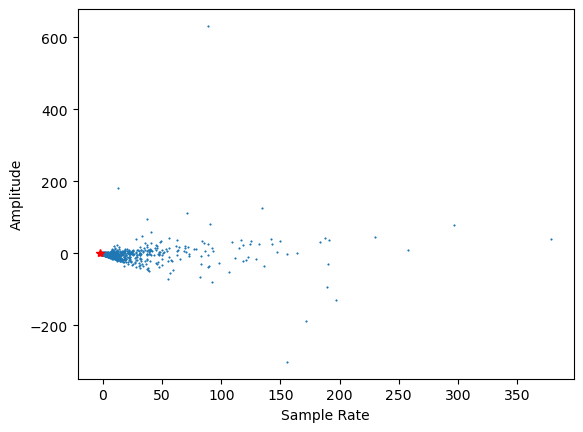

In [36]:
fig = plt.scatter(tsne_df_list[:,0],tsne_df_list[:,1],s = 1, linewidths=0.5)

plt.xlabel('Sample Rate')
plt.ylabel('Amplitude')

plt.plot(sound_coords[0], sound_coords[1], 'r*')

plt.show()

In [37]:
#find the 10 closest points to the one we input
#make a list of tuples with the distance + filename
#sort the list by decreasing dist
#take first 10

data = []

for i in tqdm(range(0, len(tsne_df_list))):
    dist = 0
    for j in range(0, len(tsne_df_list[0])):
        dist += (tsne_df_list[i][j]-sound_coords[j])**2
    data.append([dist, filename_list[i]])
#print(data)
panda_df = pd.DataFrame(data, columns = ['Distance','File Name'])
display(panda_df)
panda_df_sorted = panda_df.sort_values(by = ['Distance'], ignore_index = True)

panda_df_sorted.head(20)

  0%|          | 0/9344 [00:00<?, ?it/s]

Distance                      File Name
0     229.149369                01 F# Synth.wav
1     118.447492         01_PA_Bass_Shot_C#.wav
2      92.749807                      01_hh.wav
3     316.546722                02 F# Synth.wav
4      96.040355         02_PA_Bass_Shot_F#.wav
...          ...                            ...
9339  399.883424  wa_evolve_clap-layered_07.wav
9340  746.540619                    wheeeee.wav
9341   63.509777                      woink.wav
9342  102.035544                       womp.wav
9343   50.877635             yeet the child.wav

[9344 rows x 2 columns]

Distance                                          File Name
0   0.000000  Ultrasonic - Future Bass Essentials - Kick 02.wav
1   2.830693            HYPERBITS_Essential_Drums_Kick_45_G.wav
2   2.904063                            _RGD_HOUSE_KICK_024.wav
3   3.390288                        _RGD_SPHS_kick_drum_003.wav
4   3.535759                            MAUS - Heavy Kick 8.wav
5   3.603479            HYPERBITS_Essential_Drums_Kick_22_A.wav
6   3.609482                  Hyperbits Kick_Progressive_10.wav
7   3.677607                          ADEN_Kick_Blackbird_A.wav
8   3.695654                      StiickzZ FPHK - Kick 07 G.wav
9   3.818940                       ESWHV Fusion Kick 13 - G.wav
10  3.818940                           ESW Free Kick 18 - G.wav
11  4.058254                 VFH_kit5_drop_one_shot_kick_g#.wav
12  4.067817                Tom & Jame Never Look Back Kick.wav
13  4.199293            HYPERBITS_Essential_Drums_Kick_13_A.wav
14  4.260523           XLNT-Skrilla - Kick 09 - Trap [ D# ].wav
15  4.436369             HYPERBITS_Artist_Kick_Dada_Life_G#.wav
16  4.517331  Ultrasonic - Future Bass Essentials - Kick 48.wav
17  4.759588                                  TJMP_Kick 5 G.wav
18  4.792194  Ultrasonic - Future House Essentials - Kick 4.wav
19  4.870198                           _RGD_PUNCHY_KICK_035.wav

In [38]:
#panda_df_sorted
for i in range(0, 21):
    name = panda_df_sorted.iloc[i]['File Name']
    print(name)
    ipd.display(ipd.Audio(os.path.join(os.getcwd(),'filtered_samples/', name)))  


Ultrasonic - Future Bass Essentials - Kick 02.wav


HYPERBITS_Essential_Drums_Kick_45_G.wav


_RGD_HOUSE_KICK_024.wav


_RGD_SPHS_kick_drum_003.wav


MAUS - Heavy Kick 8.wav


HYPERBITS_Essential_Drums_Kick_22_A.wav


Hyperbits Kick_Progressive_10.wav


ADEN_Kick_Blackbird_A.wav


StiickzZ FPHK - Kick 07 G.wav


ESWHV Fusion Kick 13 - G.wav


ESW Free Kick 18 - G.wav


VFH_kit5_drop_one_shot_kick_g#.wav


Tom & Jame Never Look Back Kick.wav


HYPERBITS_Essential_Drums_Kick_13_A.wav


XLNT-Skrilla - Kick 09 - Trap [ D# ].wav


HYPERBITS_Artist_Kick_Dada_Life_G#.wav


Ultrasonic - Future Bass Essentials - Kick 48.wav


TJMP_Kick 5 G.wav


Ultrasonic - Future House Essentials - Kick 4.wav


_RGD_PUNCHY_KICK_035.wav


HYPERBITS_Essential_Drums_Kick_17_A#.wav
